In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
data = pd.read_csv("Online Sales Data.csv")
data.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


# prepare the data

In [6]:
data.isnull().sum()

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64

In [7]:
data.dropna()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
...,...,...,...,...,...,...,...,...,...
235,10236,2024-08-23,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal
236,10237,2024-08-24,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card
237,10238,2024-08-25,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
238,10239,2024-08-26,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [9]:
data.describe()

,Transaction ID,Units Sold,Unit Price,Total Revenue
count,240.00000,240.000000,240.000000,240.000000
mean,10120.50000,2.158333,236.395583,335.699375
std,69.42622,1.322454,429.446695,485.804469
min,10001.00000,1.000000,6.500000,6.500000
25%,10060.75000,1.000000,29.500000,62.965000
50%,10120.50000,2.000000,89.990000,179.970000
75%,10180.25000,3.000000,249.990000,399.225000
max,10240.00000,10.000000,3899.990000,3899.990000


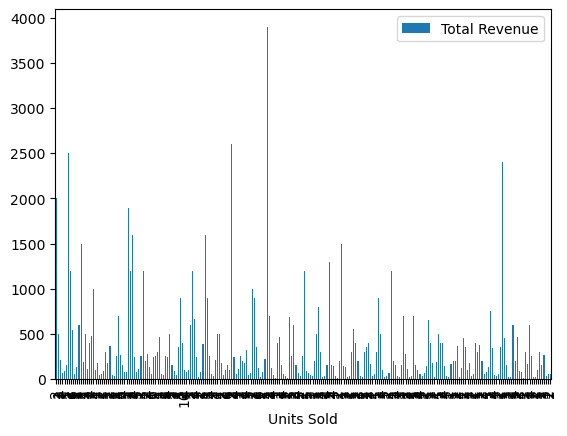

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
data.plot(kind = 'bar', x = 'Units Sold', y = 'Total Revenue')
plt.show()

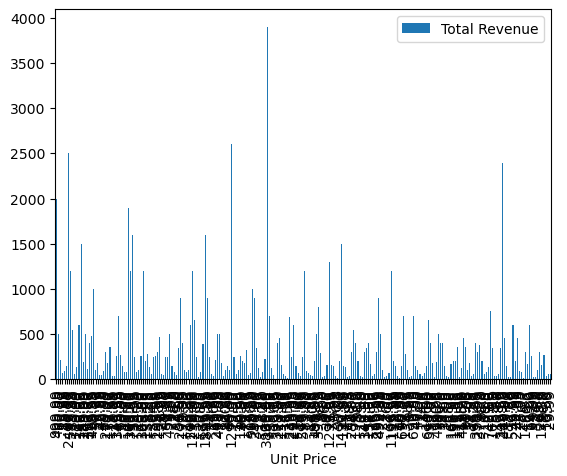

In [11]:
data.plot(kind = 'bar', x = 'Unit Price', y = 'Total Revenue')
plt.show()

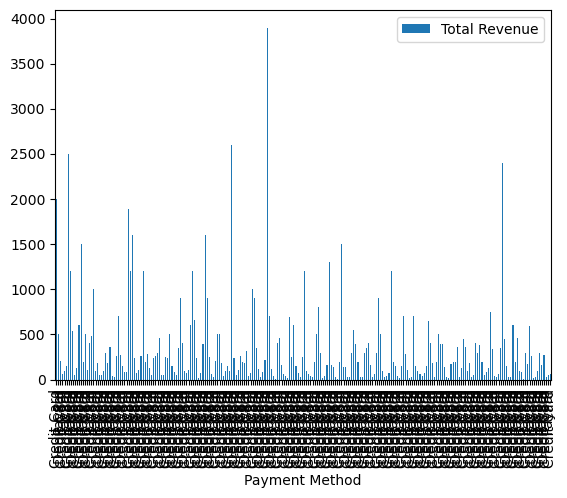

In [12]:
data.plot(kind = 'bar', x = 'Payment Method', y = 'Total Revenue')
plt.show()

# predict x, y

In [13]:
response = 'Total Revenue'
y = data[[response]]
y

,Total Revenue
0,1999.98
1,499.99
2,209.97
3,63.96
4,89.99
...,...
235,159.99
236,270.00
237,32.97
238,55.00


In [14]:
predictors = list(data.columns)
predictors.remove(response)
x = data[predictors]
x

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,Europe,PayPal
...,...,...,...,...,...,...,...,...
235,10236,2024-08-23,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,Europe,PayPal
236,10237,2024-08-24,Clothing,Nike Air Force 1 Sneakers,3,90.00,Asia,Debit Card
237,10238,2024-08-25,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,North America,Credit Card
238,10239,2024-08-26,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,Europe,PayPal


## train_test_split function

In [15]:
import pandas as pd
data = pd.read_csv("Online Sales Data.csv")
print(data.columns)


Index(['Transaction ID', 'Date', 'Product Category', 'Product Name',
       'Units Sold', 'Unit Price', 'Total Revenue', 'Region',
       'Payment Method'],
      dtype='object')


In [16]:
X = data[[ 'Units Sold', 'Unit Price']]
Y = data['Total Revenue']
print(data.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   Transaction ID        Date Product Category             Product Name  \
0           10001  2024-01-01      Electronics            iPhone 14 Pro   
1           10002  2024-01-02  Home Appliances         Dyson V11 Vacuum   
2           10003  2024-01-03         Clothing         Levi's 501 Jeans   
3           10004  2024-01-04            Books        The Da Vinci Code   
4           10005  2024-01-05  Beauty Products  Neutrogena Skincare Set   

   Units Sold  Unit Price  Total Revenue         Region Payment Method  
0           2      999.99        1999.98  North America    Credit Card  
1           1      499.99         499.99         Europe         PayPal  
2           3       69.99         209.97           Asia     Debit Card  
3           4       15.99          63.96  North America    Credit Card  
4           1       89.99          89.99         Europe         PayPal  


## feature names for X 

In [17]:
feature_names = ['Units Sold', 'Unit Price']
X_train.columns = feature_names
X_test.columns = feature_names


## feature names for Y

In [18]:
feature_names = ['Total Revenue']
y_train.columns = feature_names
y_test.columns = feature_names


# Fit the model

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [20]:
model.intercept_

array([-18.4833565])

In [21]:
model.intercept_

array([-18.4833565])

## Evalute the value

In [22]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
 
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 18125.060402436484
R-squared: 0.9007952596421704


# Newdata

In [23]:
new_data = [[5, 90000]]
predicted_TotalRevenue= model.predict(new_data)
print("Predicted TotalRevenue:", predicted_TotalRevenue[0])

Predicted TotalRevenue: [100071.96289623]


c:\Users\bhahm\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


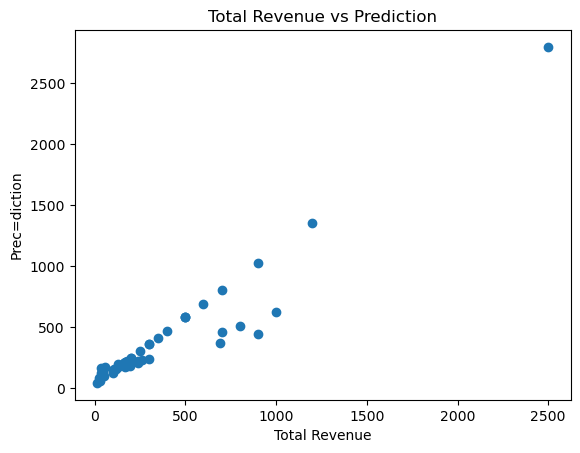

In [24]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Total Revenue")
plt.ylabel("Prec=diction")
plt.title("Total Revenue vs Prediction")
plt.savefig("actual_vs_prediction")
plt.show()